In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
 

data = pd.read_csv('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv', header=None, names = ['Pregnancies', 'Glocuse', 'Blood pressure', 'Skin thickness', 'Insulin', 'BMI', 'Diabetes pedigree function', 'Age', 'Class variable (0 or 1)'], skiprows=9)

data.head()

,Pregnancies,Glocuse,Blood pressure,Skin thickness,Insulin,BMI,Diabetes pedigree function,Age,Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
data.describe()

,Pregnancies,Glocuse,Blood pressure,Skin thickness,Insulin,BMI,Diabetes pedigree function,Age,Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glocuse                     768 non-null    int64  
 2   Blood pressure              768 non-null    int64  
 3   Skin thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class variable (0 or 1)     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


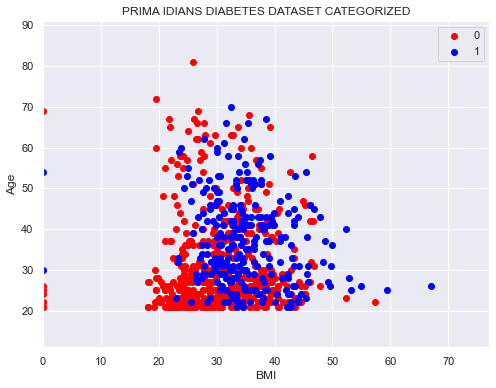

In [51]:
x_min, x_max = data['BMI'].min(), data['BMI'].max() + 10
y_min, y_max = data['Age'].min() - 10, data['Age'].max() + 10
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(8, 6))
for key, group in data.groupby(by='Class variable (0 or 1)'):
    plt.scatter(group['BMI'], group['Age'], c=colors[key], label=key)
    

plt.xlabel('BMI')
plt.ylabel('Age')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
ax.set_title("PRIMA IDIANS DIABETES DATASET CATEGORIZED")
ax.legend()
 
plt.show()

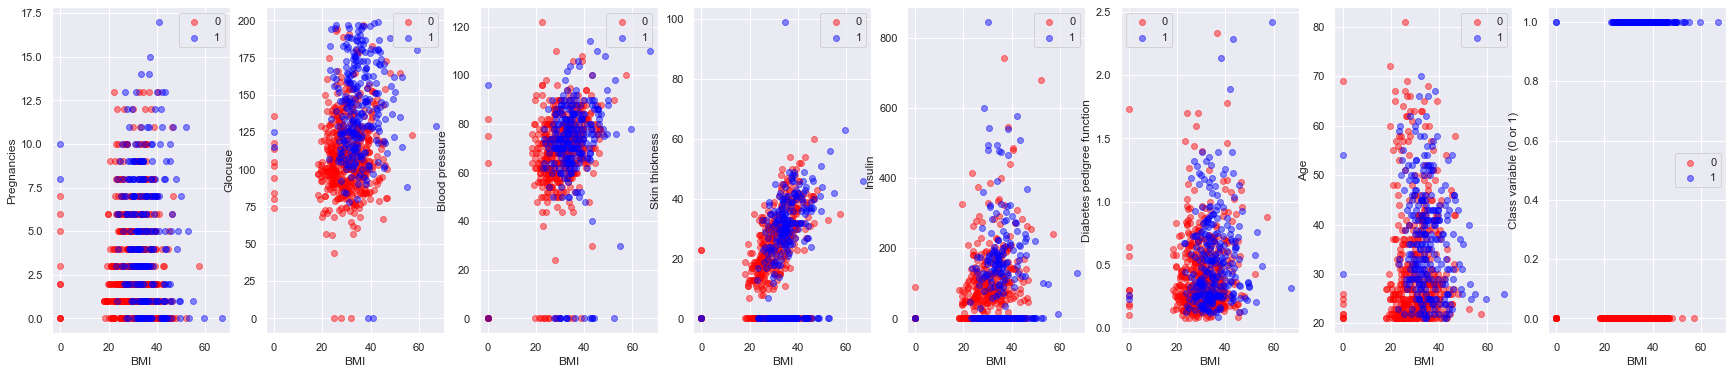

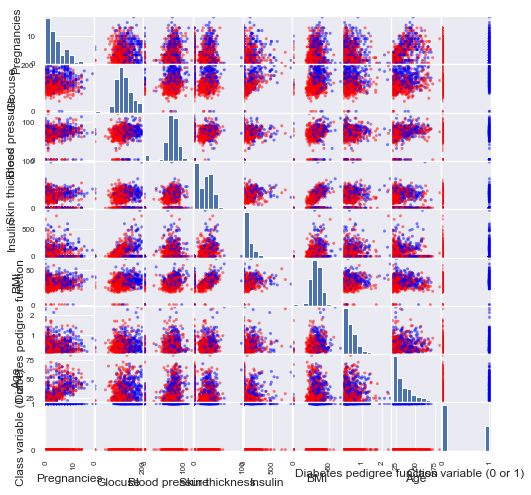

In [54]:
fig, ax = plt.subplots(1,8,figsize=(30, 6))
plt_position = 1
feature_x= 'BMI'
for feature_y in data.loc[:, data.columns != 'BMI']:
    plt.subplot(1, 8, plt_position) 
    for dClass, color in colors.items():
        plt.scatter(data.loc[data['Class variable (0 or 1)']==dClass, feature_x],
                    data.loc[data['Class variable (0 or 1)']==dClass, feature_y],
                    label=dClass,
                    alpha = 0.45, # transparency
                    color=color)
    plt.xlabel('BMI')
    plt.ylabel(feature_y)
    plt.legend()
    plt_position += 1
plt.show()
pd.plotting.scatter_matrix(data, figsize=(8, 8), 
                           color = data['Class variable (0 or 1)'].apply(lambda x: colors[x]));
plt.show()

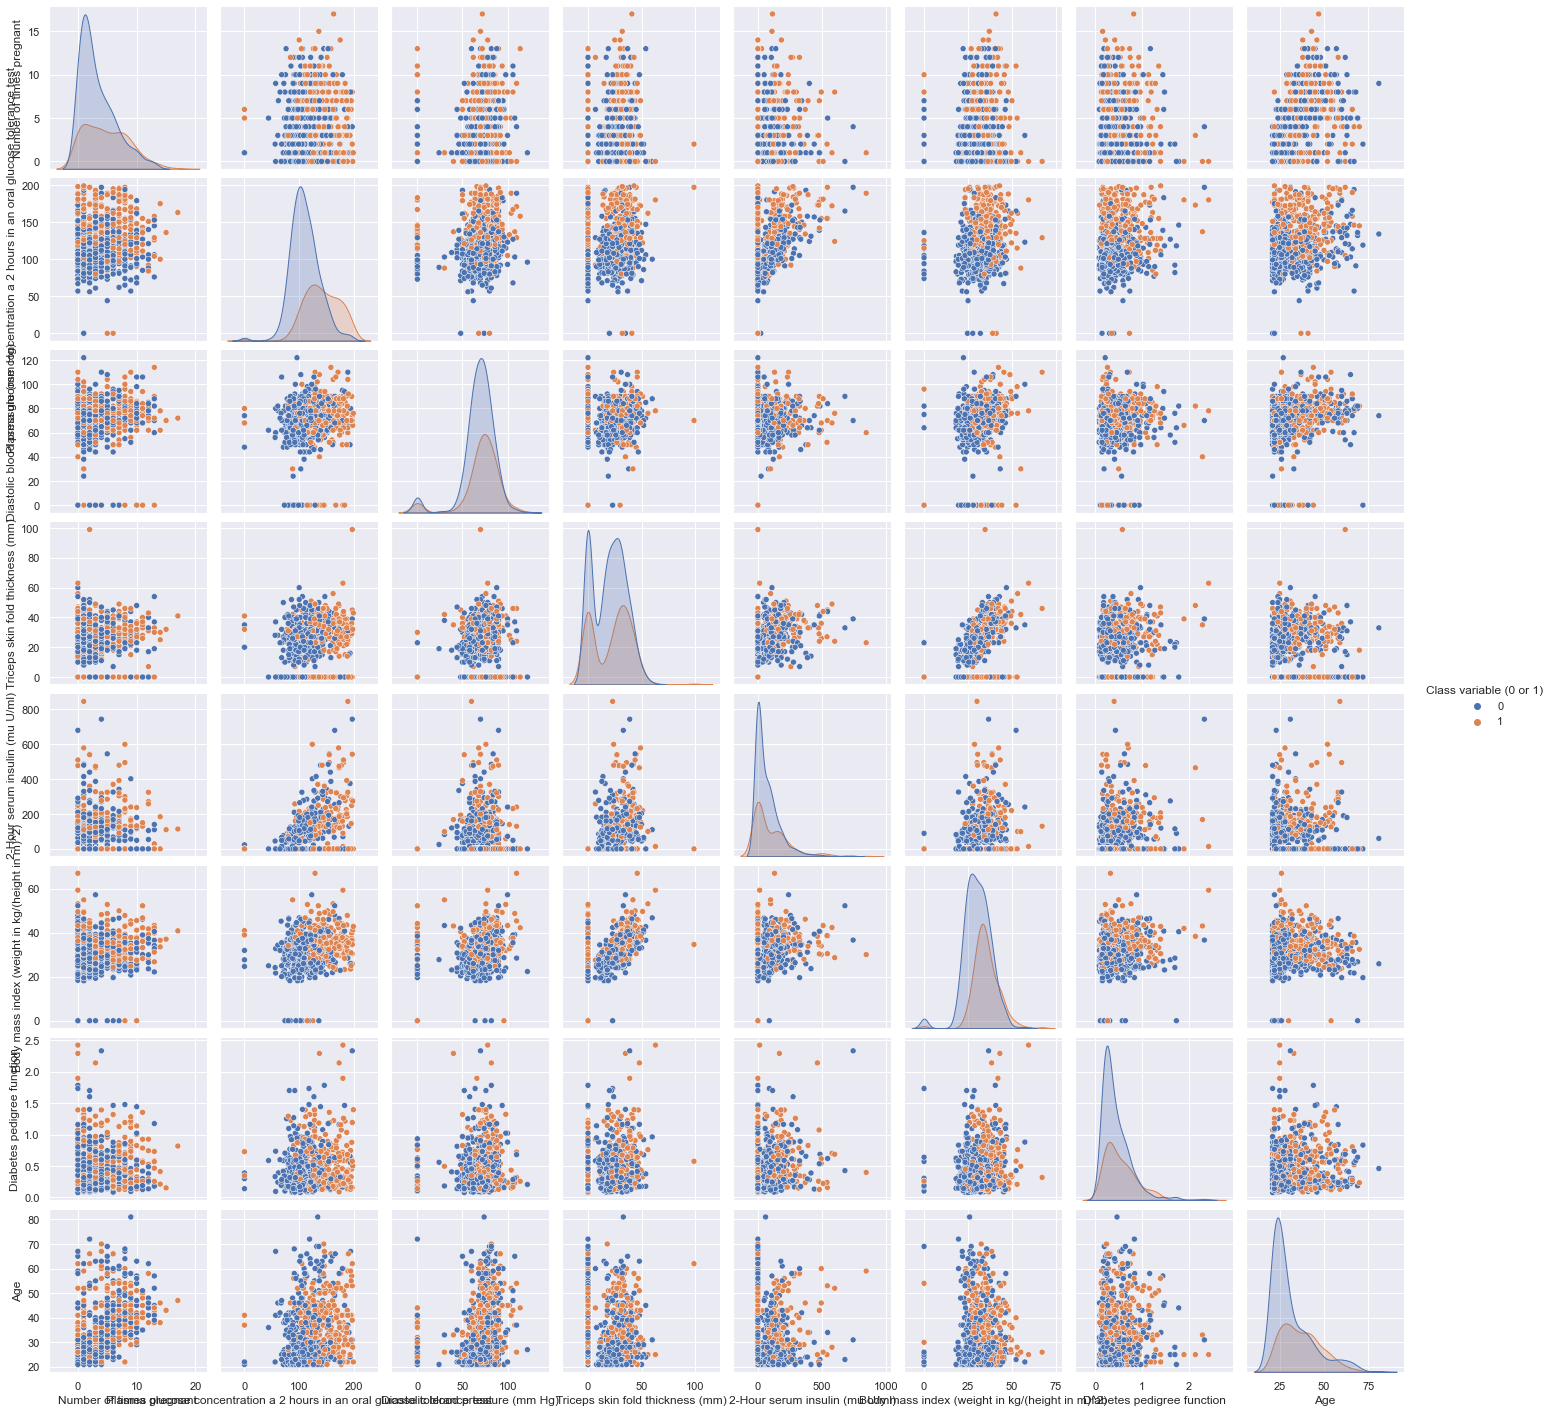

In [31]:
import seaborn as sns
sns.set()
sns.pairplot(data, hue="Class variable (0 or 1)")

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = data.iloc[:, 0:8]
y = data.iloc[:, 8]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
result = accuracy_score(y_test, predictions)
print(result)

0.7135416666666666
